In [ ]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Time removed:  23309.54999980105
Reaches 75 at time:  25750.199999765533
time 41156.45000015168


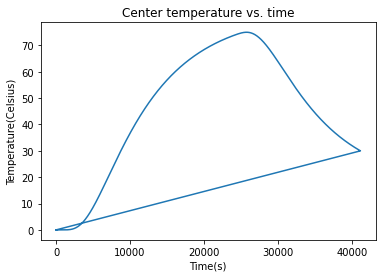

In [ ]:
# Setup basic domain
L = 0.1
D = 0.0000001

N = 10     # Number of lattice points
h = L / N  # Spatial step size

# Setup final solution time + time-step
tf = 0
t = 0
k  = 0.05

w = np.zeros(N+1)
w_next = np.zeros(N+1)

#arbritruary large vectors
temp_center = np.zeros(9000000) #list of temperature at center of zero
t_list = np.zeros(9000000) #to plot

w[N] = 150 #boundary condition

#inside oven
while w[0] <= 73.0092655: #found through guess and check 
      #set boundary conditions
      w[N] = 150
      w[0] = w[1] #no flux at center

      for i in range(1, N+1): 
          if i == 1:
              w_next[i] = (1 - (2*k*D/(h*h))*(1+1/i))*w[i] + (D*k/(h*h) + 2*D*k/(i*h*h))*w[i+1]
          elif i == N:
              w_next[i] = (D*k/(h*h))*w[i-1] + (1 - (2*k*D/(h*h))*(1+1/i))*w[i]
          else:
              w_next[i] = (D*k/(h*h))*w[i-1] + (1 - (2*k*D/(h*h))*(1+1/i))*w[i] + (D*k/(h*h) + 2*D*k/(i*h*h))*w[i+1]
    
      w = w_next
      temp_center[t] = w[0] 
      t_list[t] = tf 
      t = t + 1
      tf = tf + k
    
#      if t%100000 == 0:
#        print("in oven w =", w[0])

print("Time removed: ", tf)

#outside oven
reaches75 = 0

while w[0] >= 30:
      w[N] = 30
      w[0] = w[1] #no flux at center

      for i in range(1, N+1): #NOTE TO JESS CHECK + or - IN TERM a
          if i == 1:
              w_next[i] = (1 - (2*k*D/(h*h))*(1+1/i))*w[i] + (D*k/(h*h) + 2*D*k/(i*h*h))*w[i+1]
          elif i == N:
              w_next[i] = (D*k/(h*h))*w[i-1] + (1 - (2*k*D/(h*h))*(1+1/i))*w[i]
          else:
              w_next[i] = (D*k/(h*h))*w[i-1] + (1 - (2*k*D/(h*h))*(1+1/i))*w[i] + (D*k/(h*h) + 2*D*k/(i*h*h))*w[i+1]
    
      #To Check:
      if w[0] >= 75 and reaches75 == 0:    
            print("Reaches 75 at time: ", tf)
            reaches75 = 1 #to stop printing after minimum time found
            
      w = w_next
      temp_center[t] = w[0] 
      t_list[t] = tf 
      t = t + 1
      tf = tf + k
    
     # if t%1000 == 0:
      #  print("out of oven w =", w[0])

print("time", tf)
#print(temp_center)
plt.plot(t_list, temp_center)
plt.title('Center temperature vs. time')
plt.xlabel('Time(s)')
plt.ylabel('Temperature(Celsius)')
plt.show()
